In [11]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\monol\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [12]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [13]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv("mergedData.csv", index_col=0)

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

df.head()

,Title,Year,Release Date,Genre,IMDb Rating,Metascore,Rated,Box_Office_Adjusted,GDP,GDP_1,...,musical,documentary,western,news,Month_Year,President,End Date,Approving,Disapproving,Unsure/NoData
0,Pulp Fiction,1994,14-Oct-94,"Crime, Drama",8.9,94.0,R,174798000.0,4.028831,2.752852,...,0,0,0,0,10/1994,Clinton,1994.0,43.333333,49.666667,5.666667
1,The Amazing Spider-Man 2,2014,2-May-14,"Action, Adventure, Sci-Fi",6.6,53.0,PG-13,185110348.7,2.525971,1.842081,...,0,0,0,0,05/2014,Barack Obama,2014.0,44.129032,50.806452,5.064516
3,Jurassic Park,1993,11-Jun-93,"Adventure, Sci-Fi, Thriller",8.1,68.0,PG-13,75197468.8,2.752852,3.522443,...,0,0,0,0,06/1993,Clinton,1993.0,39.666667,48.666667,10.000000
4,The Lion King,1994,24-Jun-94,"Animation, Adventure, Drama, Family, Musical",8.5,83.0,G,152669828.7,4.028831,2.752852,...,1,0,0,0,06/1994,Clinton,1994.0,46.000000,45.666667,7.333333
5,Toy Story,1995,22-Nov-95,"Animation, Adventure, Comedy, Family, Fantasy",8.3,95.0,G,301126000.0,2.684285,4.028831,...,0,0,0,0,11/1995,Clinton,1995.0,52.500000,38.500000,8.000000


In [15]:
# Set features. This will also be used as oour X values.

# economic data - 3 years rolling average GDP, Unemployment, Consumer Confidence, Median Income
selected_features1 = df.iloc[:,20:24]

# political data - current year presidential approval/disapproval rating
selected_features2 = df.iloc[:,49:51]

# merge economic and political features
selected_features = pd.merge(selected_features1, selected_features2, left_index=True, right_index=True)

selected_features.head()

,GDP_AVG,Unemployment_AVG,Confidence_AVG,Median_Income_AVG,Approving,Disapproving
0,3.434709,6.830555,99.689548,53913.333333,43.333333,49.666667
1,2.205866,7.202778,99.206066,56908.333333,44.129032,50.806452
3,2.055678,7.075000,99.125086,53941.666667,39.666667,48.666667
4,3.434709,6.830555,99.689548,53913.333333,46.000000,45.666667
5,3.155323,6.197222,100.265617,54591.333333,52.500000,38.500000


In [16]:
from sklearn.model_selection import train_test_split

# train_test like numpy arrays, so transform dataframes into arrays
# reshape as needed by train_test
X = selected_features.to_numpy()
y = df["Box_Office_Adjusted"].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
# Scale our data
from sklearn.preprocessing import StandardScaler

# create a scaler fit for training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# scale the train and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

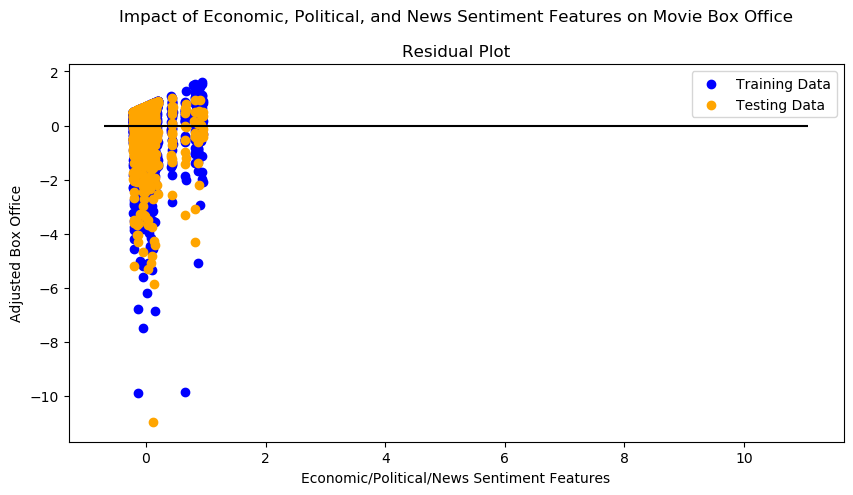

In [36]:
from sklearn.linear_model import LinearRegression

# use a linear regression model for our data
model = LinearRegression()

# fit training data for model
model.fit(X_train_scaled, y_train_scaled)

# create a residual plot of training and test data
plt.figure(figsize=(10,5), dpi=(100))
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Impact of Economic, Political, and News Sentiment Features on Movie Box Office\n\nResidual Plot")
plt.xlabel("Economic/Political/News Sentiment Features")
plt.ylabel("Adjusted Box Office")
plt.savefig('images/movie_box_office_ML.png')
plt.show()

In [35]:
# Display R^2 scores of training and test data
print(f"Training Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test_scaled)}")

Training Data Score: 0.04548017829826767
Testing Data Score: 0.05781108560404524


In [33]:
# save our model
import joblib
filename = 'box_office_model_final_project.sav'
joblib.dump(model, filename)

['box_office_model_final_project.sav']